In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [3]:
# How to read a csv file with no column names and set the names of the Dtaframe
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 
             'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("data/diabetes.csv", header=None, names=col_names)

feature_names = col_names[:-1]

print(type(df))
print(df.head())
# print(df.info())

<class 'pandas.core.frame.DataFrame'>
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [4]:
X = df.drop("label", axis='columns')
y = df.label
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [5]:
# Split inot 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [6]:
# Create Decision Tree classifer object
# tree = DecisionTreeClassifier()
tree = DecisionTreeClassifier(max_depth=8)

# Train Decision Tree Classifer
tree = tree.fit(X_train, y_train)
print(tree.get_depth())

8


In [7]:
#Predict the response for test dataset
y_hat = tree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_hat))

Accuracy: 0.7229437229437229


In [8]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[124  22]
 [ 42  43]]

TN 124 FP 22 FN 42 TP 43


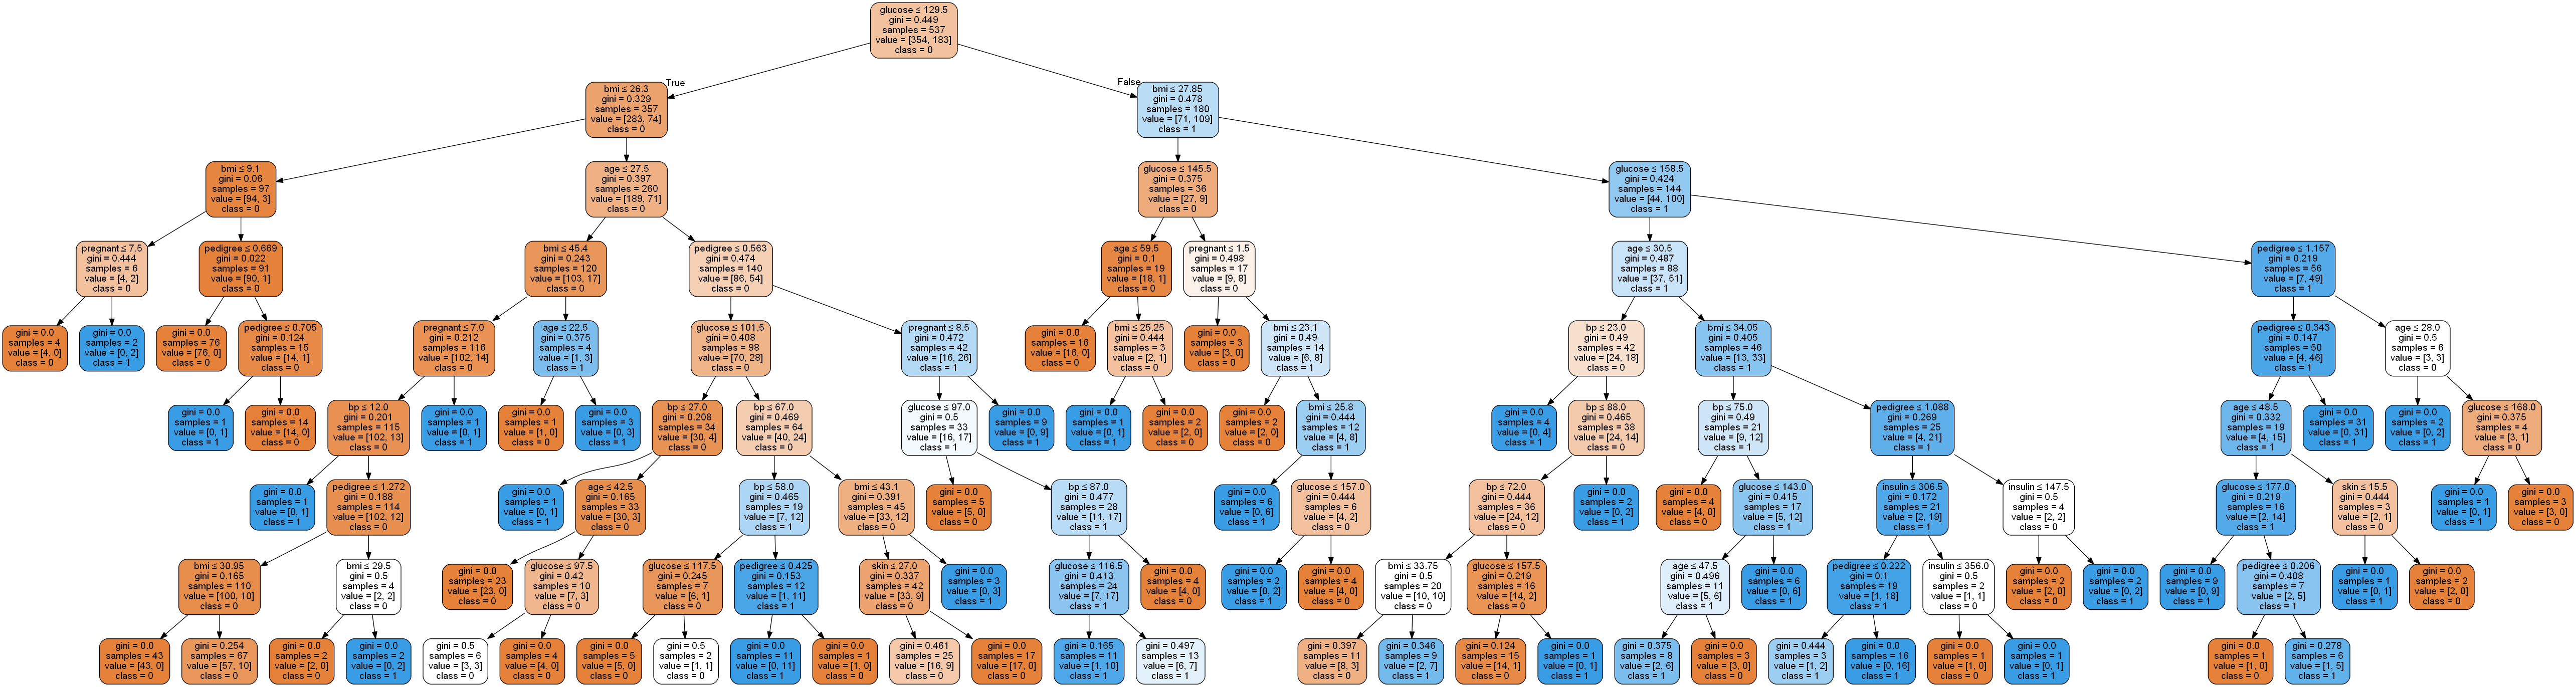

In [9]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/diabetes.png')
Image(graph.create_png())